# Visualization Assignment - Answer Key

### Import Packages
- by default plotly charts will be shown below Jupyter Notebook cell blocks
- as an alternative you can uncomment the last two lines below to show the plotly graphs in their own tabs in your browser

In [1]:
#%% Import Packages
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

### Exercise 1 – Time Series

In this exercise you will practice plotting time series data, annotating and labeling graphs. 
1.	Load the Apple stock data stored in AAPL.csv into a pandas data frame.
    - Set the index to be DateTime type.
2.	Plot the 'Adj Close' as a time series plot using plotly express .line().
3.	Label the title along with the X and Y axis.
4.	Find the global minimum and maximum. Store these values in variables so that you can annotate them on the graph.
    - Use .min() and .max() methods to find the values.
    - Use the .idxmin() and .idxmax() to find the location (date).
    
Challenge: Find and annotate the min and max for each year. This can be done in a loop.

Documentation for annotations: https://plotly.com/python/reference/layout/annotations/

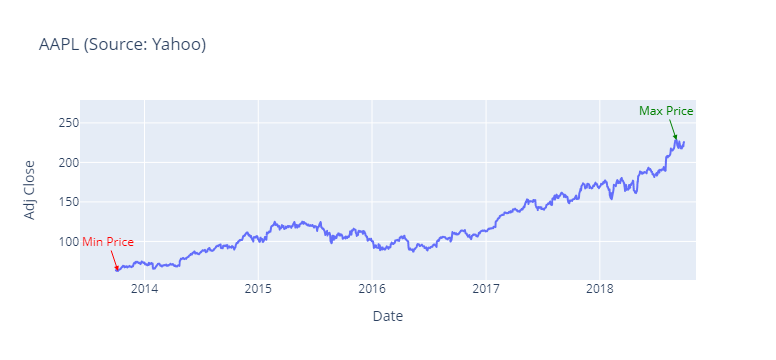

In [2]:
aapl = pd.read_csv("StockData/AAPL.csv", index_col=['Date'], parse_dates=['Date'])
maxPrice = aapl['Adj Close'].max()
maxPriceDate = aapl['Adj Close'].idxmax()
minPrice = aapl['Adj Close'].min()
minPriceDate = aapl['Adj Close'].idxmin()

fig = px.line(aapl, x=aapl.index, y='Adj Close', title="AAPL (Source: Yahoo)")
fig.add_annotation(x=maxPriceDate, y=maxPrice, text="Max Price", showarrow=True, arrowhead=2, arrowcolor='green',
                  font=dict(size=12, color="green"))

fig.add_annotation(x=minPriceDate, y=minPrice, text="Min Price", showarrow=True, arrowhead=2, arrowcolor='red',
                  font=dict(size=12, color="red"))
fig.show()

#### Challenge with Plotly

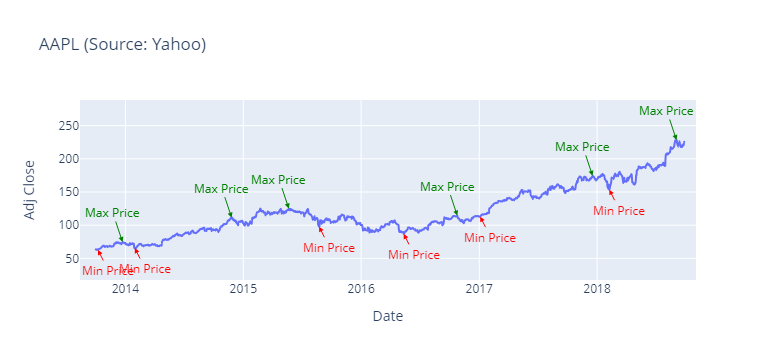

In [4]:
#Challenge
minyear = min(aapl.index.year)
maxyear = max(aapl.index.year)

fig = px.line(aapl, x=aapl.index, y='Adj Close', title="AAPL (Source: Yahoo)")

for year in range(minyear, maxyear + 1):
    maxPrice = aapl.loc[str(year)]['Adj Close'].max()
    maxPriceDate = aapl.loc[str(year)]['Adj Close'].idxmax()
    minPrice = aapl.loc[str(year)]['Adj Close'].min()
    minPriceDate = aapl.loc[str(year)]['Adj Close'].idxmin()
    
    fig.add_annotation(x=maxPriceDate, y=maxPrice, text="Max Price", showarrow=True, arrowhead=2, arrowcolor='green',
                  font=dict(size=12, color="green"), hovertext=str(year))

    fig.add_annotation(x=minPriceDate, y=minPrice, text="Min Price", showarrow=True, arrowhead=2, arrowcolor='red',
                  font=dict(size=12, color="red"), ay=20, ax=10, hovertext=str(year))

fig.show()

#### Answer with Matplotlib

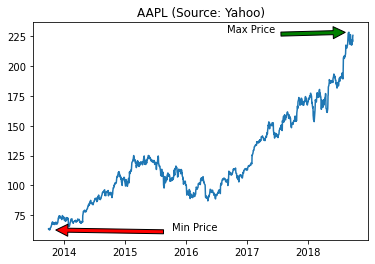

In [19]:
#with matplotlib
aapl = pd.read_csv("StockData/AAPL.csv", index_col=['Date'], parse_dates=['Date'])
maxPrice = aapl['Adj Close'].max()
maxPriceDate = aapl['Adj Close'].idxmax()
minPrice = aapl['Adj Close'].min()
minPriceDate = aapl['Adj Close'].idxmin()

plt.plot(aapl.index, aapl['Adj Close'])
plt.title('AAPL (Source: Yahoo)')
plt.annotate('Max Price', xy=(maxPriceDate,maxPrice), 
                xytext=(maxPriceDate + pd.offsets.DateOffset(years=-2), maxPrice),
                arrowprops=dict(facecolor="green", shrink=0.05))
plt.annotate('Min Price', xy=(minPriceDate,minPrice),
                xytext=(minPriceDate  + pd.offsets.DateOffset(years=2), minPrice), 
                arrowprops=dict(facecolor="red", shrink=0.05))
plt.show()

#### Challenge with Matplotlib

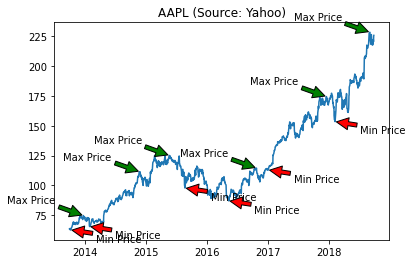

In [31]:
#challenge with matplotlib
aapl = pd.read_csv("StockData/AAPL.csv", index_col=['Date'], parse_dates=['Date'])

minyear = min(aapl.index.year)
maxyear = max(aapl.index.year)


plt.plot(aapl.index, aapl['Adj Close'])
plt.title('AAPL (Source: Yahoo)')

for year in range(minyear, maxyear + 1):
    maxPrice = aapl.loc[str(year)]['Adj Close'].max()
    maxPriceDate = aapl.loc[str(year)]['Adj Close'].idxmax()
    minPrice = aapl.loc[str(year)]['Adj Close'].min()
    minPriceDate = aapl.loc[str(year)]['Adj Close'].idxmin()

    plt.annotate('Max Price', xy=(maxPriceDate,maxPrice), 
                    xytext=(maxPriceDate + pd.offsets.DateOffset(months=-15), maxPrice+10),
                    arrowprops=dict(facecolor="green", shrink=0.05))
    plt.annotate('Min Price', xy=(minPriceDate,minPrice),
                    xytext=(minPriceDate  + pd.offsets.DateOffset(months=5), minPrice-10), 
                    arrowprops=dict(facecolor="red", shrink=0.05))
plt.show()

### Exercise 2 – Multiple Graphs

In this exercise you will practice creating multiple plots using subplots.
1.	Load the stock data for the following tickers: S&P500, AAPL, AXP, BA, CAT, CSCO.
    - Set the index to be DateTime type.
2.	Create a subplot with 3 rows and 2 columns.
3.	Plot the ‘Adj Close’ for each ticker.
    - Remember to set the title and label the y-axis of each graph.

Challenge: Use loops to automate the process to load the data, concatenate into a single data frame. Below are some code snippets and hints to help.

Documentation for subplots: https://plotly.com/python/subplots/

In [4]:
from plotly.subplots import make_subplots

In [5]:
sp500 = pd.read_csv('StockData/SP500.csv', header=0, index_col=0, parse_dates=True)
aapl = pd.read_csv('StockData/AAPL.csv', header=0, index_col=0, parse_dates=True)
axp = pd.read_csv('StockData/AXP.csv', header=0, index_col=0, parse_dates=True)
ba = pd.read_csv('StockData/BA.csv', header=0, index_col=0, parse_dates=True)
cat = pd.read_csv('StockData/CAT.csv', header=0, index_col=0, parse_dates=True)
csco = pd.read_csv('StockData/csco.csv', header=0, index_col=0, parse_dates=True)

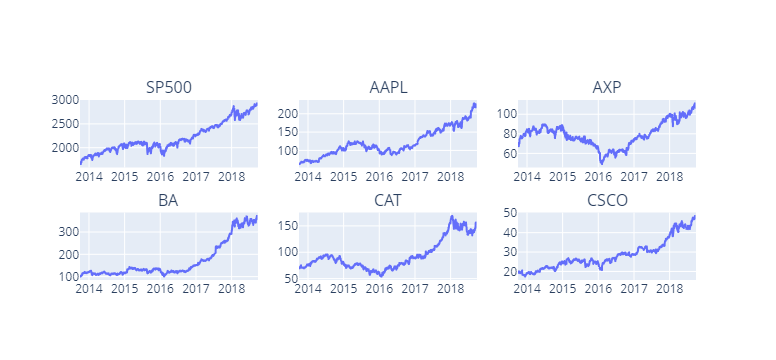

In [6]:
numRows = 2
numCols = 3

fig = make_subplots(rows=numRows, cols=numCols, subplot_titles=('SP500', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO'))

fig1 = px.line(sp500, x=sp500.index, y='Adj Close')
fig2 = px.line(aapl, x=aapl.index, y='Adj Close')
fig3 = px.line(axp, x=axp.index, y='Adj Close')
fig4 = px.line(ba, x=ba.index, y='Adj Close')
fig5 = px.line(cat, x=cat.index, y='Adj Close')
fig6 = px.line(csco, x=csco.index, y='Adj Close')

fig.append_trace(fig1["data"][0], row=1, col=1)
fig.append_trace(fig2["data"][0], row=1, col=2)
fig.append_trace(fig3["data"][0], row=1, col=3)
fig.append_trace(fig4["data"][0], row=2, col=1)
fig.append_trace(fig5["data"][0], row=2, col=2)
fig.append_trace(fig6["data"][0], row=2, col=3)
fig.show()

#### Challenge

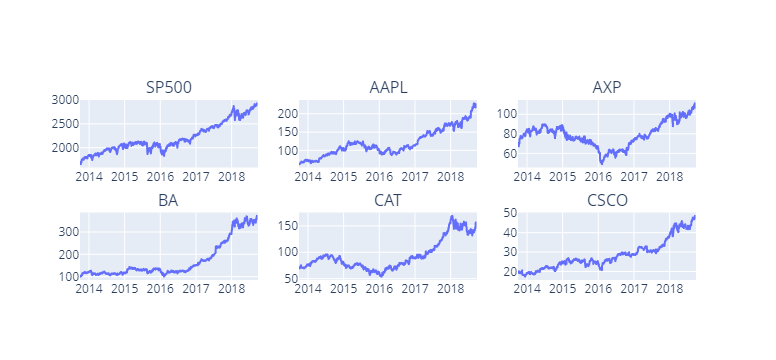

In [7]:
import math
tickers = ['SP500', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO']
dfs = []

numRows = 2
numCols = 3

mainfig = make_subplots(rows=numRows, cols=numCols, subplot_titles=tickers)

#Load all data
for ticker in tickers:
    df = pd.read_csv('StockData/'+ticker+'.csv', header=0, index_col=0, parse_dates=True)
    df['Ticker'] = ticker
    dfs.append(df)
    
#Create subplots
for idx in range(len(dfs)):
    df = dfs[idx]
    
    mod = (idx+1) % numCols
    colPos = mod if mod !=0 else numCols
    rowPos = math.ceil((idx+1)/numCols)
    
    
    figPlot = px.line(df, x=df.index, y='Adj Close')
    fig.append_trace(figPlot["data"][0], row=rowPos, col=colPos)

fig.show()

#### Challenge with Matplotlib

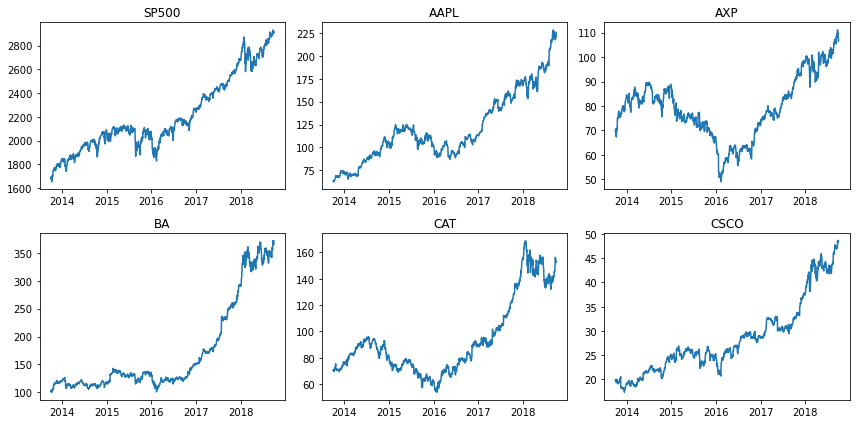

In [40]:
import math
tickers = ['SP500', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO']
dfs = []

#Load all data
for ticker in tickers:
    df = pd.read_csv('StockData/'+ticker+'.csv', header=0, index_col=0, parse_dates=True)
    df['Ticker'] = ticker
    dfs.append(df)

numRows = 2
numCols = 3
plt.figure(figsize=(12,6))
for idx, ticker in enumerate(tickers): #idx = index of each ticker in list, ticker = each ticker in list
    plt.subplot(numRows, numCols, idx+1)
    df = dfs[idx]
    plt.plot(df.index, df['Adj Close'])
    plt.title(ticker)
    
plt.tight_layout()

plt.show()

### Exercise 3 – Box Plots & Histograms

In this exercise you will practice creating box plots and histograms with plotly.
1.	Load the stock data for the following tickers: S&P500, AAPL, AXP, BA, CAT, CSCO.
2.	Calculate the daily returns for each of the tickers and merge all the tables into one DataFrame.
3.	Use plotly’s .box() function to create box plots of the returns for all the tickers.
4.	Use plotly’s .histogram() function to create multiple histograms of the returns of all tickers
    -	Experiment with adding the function argument facet_col or facet_row to show the histograms side by side or on top of each other.


#### Boxplots with Plotly

In [41]:
#Load all data
tickers = ['SP500', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO']
dfs = []
for ticker in tickers:
    df = pd.read_csv('StockData/'+ticker+'.csv', header=0, index_col=0, parse_dates=True)
    df['Returns'] = df['Adj Close'].pct_change()
    df['Ticker'] = ticker
    dfs.append(df)
    
allData = pd.concat(dfs)

In [42]:
allData

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-09-30  1687.260010  1687.260010  1674.989990  1681.550049  1681.550049   
2013-10-01  1682.410034  1696.550049  1682.069946  1695.000000  1695.000000   
2013-10-02  1691.900024  1693.869995  1680.339966  1693.869995  1693.869995   
2013-10-03  1692.349976  1692.349976  1670.359985  1678.660034  1678.660034   
2013-10-04  1678.790039  1691.939941  1677.329956  1690.500000  1690.500000   
...                 ...          ...          ...          ...          ...   
2018-09-24    48.209999    48.619999    48.189999    48.439999    48.439999   
2018-09-25    48.570000    48.880001    48.430000    48.470001    48.470001   
2018-09-26    48.740002    49.060001    48.270000    48.410000    48.410000   
2018-09-27    48.330002    48.759998    48.209999    48.330002    48.330002   
2018-09-28    48.270000    48.799999    48.060001    48.650002    48.650002   

                Volume   Returns Ticker  
Date                                     
2013-09-30  3308630000       NaN  SP500  
2013-10-01  3238690000  0.007999  SP500  
2013-10-02  3148600000 -0.000667  SP500  
2013-10-03  3279650000 -0.008979  SP500  
2013-10-04  2880270000  0.007053  SP500  
...                ...       ...    ...  
2018-09-24    21819300 -0.002471   CSCO  
2018-09-25    15810800  0.000619   CSCO  
2018-09-26    20080100 -0.001238   CSCO  
2018-09-27    15910100 -0.001653   CSCO  
2018-09-28    15474300  0.006621   CSCO  

[7555 rows x 8 columns]

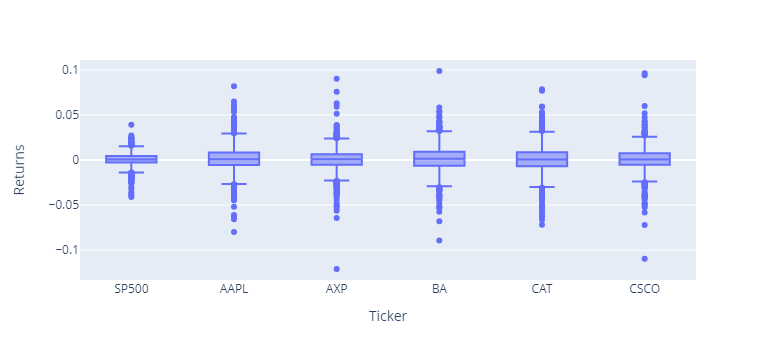

In [43]:
fig = px.box(allData, y="Returns", x="Ticker")
fig.show()

#### Boxplots with Seaborn

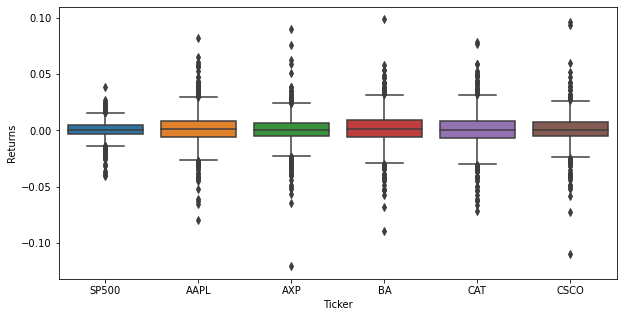

In [53]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(data=allData, x='Ticker',y='Returns')
plt.show()

#### Histograms with Plotly

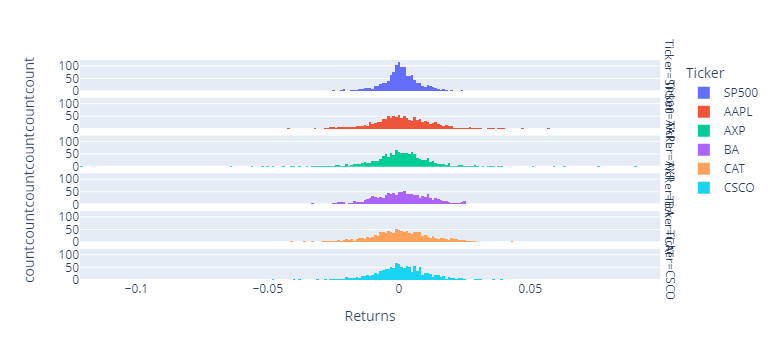

In [11]:
figHist = px.histogram(allData, x="Returns", color="Ticker", facet_row='Ticker')
figHist

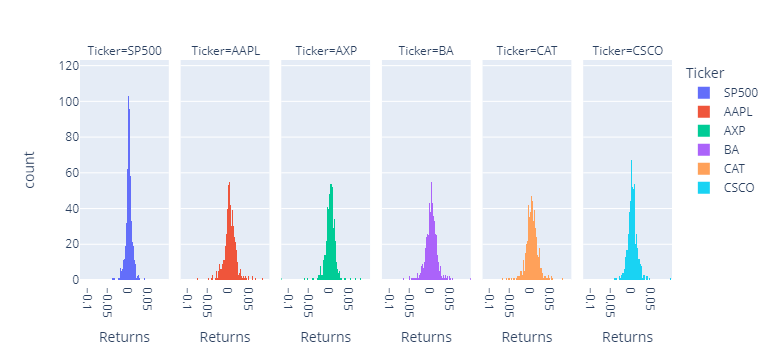

In [12]:
figHist = px.histogram(allData, x="Returns", color="Ticker", facet_col='Ticker')
figHist

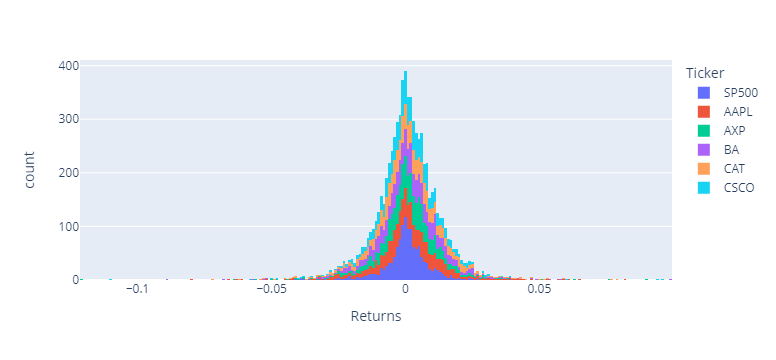

In [13]:
figHist = px.histogram(allData, x="Returns", color="Ticker")
figHist

#### Histograms with Seaborn

<Figure size 720x720 with 0 Axes>

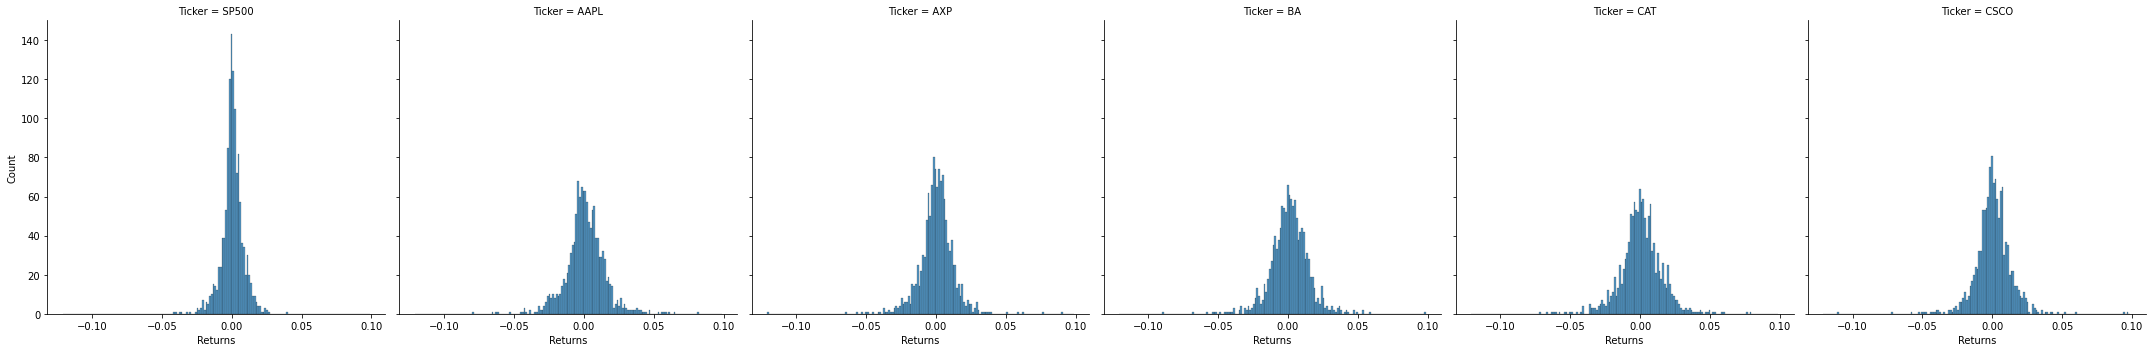

In [68]:
plt.figure(figsize=(10,10))
sns.displot(allData.reset_index(), x="Returns", col="Ticker")

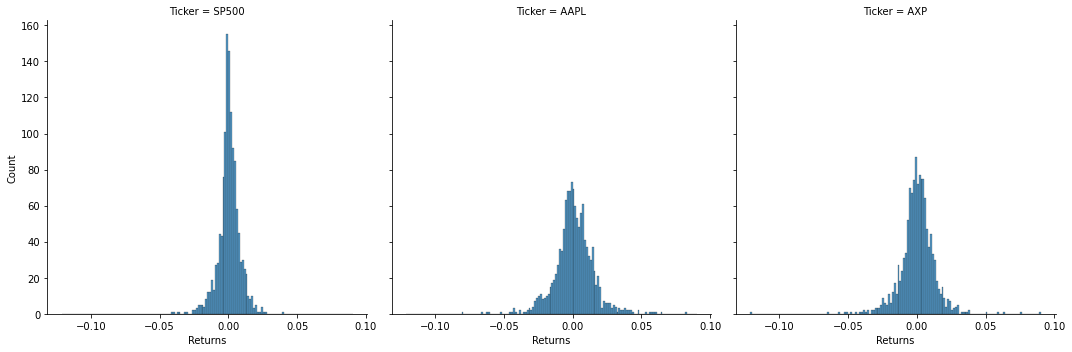

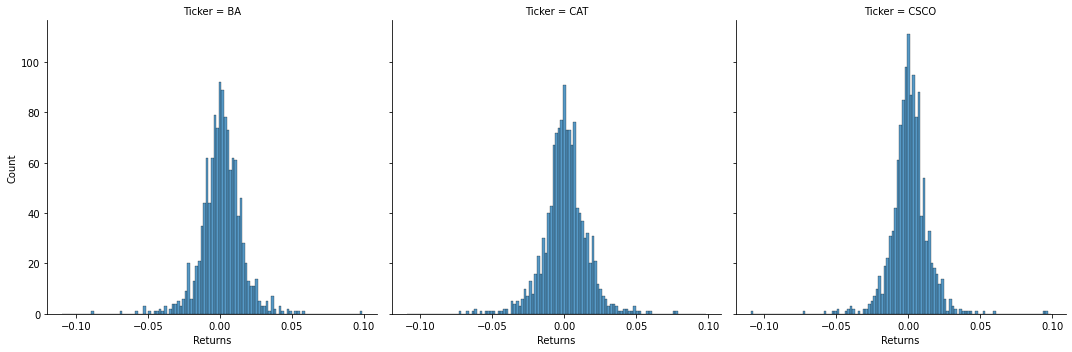

In [70]:
df1 = allData[allData['Ticker'].isin(tickers[0:3])]
df2 = allData[allData['Ticker'].isin(tickers[3:])]
sns.displot(df1.reset_index(), x="Returns", col="Ticker")
sns.displot(df2.reset_index(), x="Returns", col="Ticker")